In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import xgboost as xgb

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
x_data = data.drop(columns='Outcome', axis=1)
y_data = data['Outcome']
x_data = x_data.astype('float64')
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [7]:
data = pd.concat([x_data, y_data], axis=1)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Diabetes', 'Diabetes']); ax.yaxis.set_ticklabels(['No Diabetes', 'Diabetes']) 
    plt.show()

In [12]:
X = data.drop(columns='Outcome', axis=1)
Y = data['Outcome'].to_numpy()

In [13]:
transform = StandardScaler()
X = transform.fit_transform(X)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(x_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [16]:
parameters = {
    'C': np.logspace(-3, 3, 5),
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}

lr = LogisticRegression()

In [17]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag']})

In [18]:
print("Best Parameters: ", logreg_cv.best_params_)
print("Accuracy Score: ", logreg_cv.best_score_)

Best Parameters:  {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score:  0.7656530936012692


In [19]:
test_accuracy = logreg_cv.score(x_test, y_test)
print(test_accuracy)

0.7662337662337663


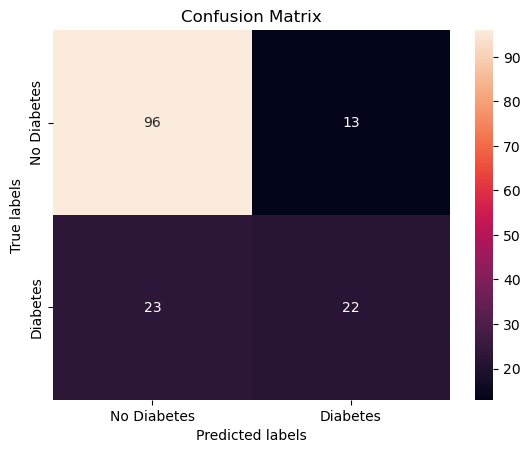

In [20]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [21]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

tree = DecisionTreeClassifier()

In [22]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(x_train, y_train)

C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\base.py", line 666, in _valid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("Best Parameters: ", tree_cv.best_params_)
print("Accuracy Score: ", tree_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Score:  0.7346113167636171


In [24]:
best_model = tree_cv.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print(test_accuracy)

0.7402597402597403


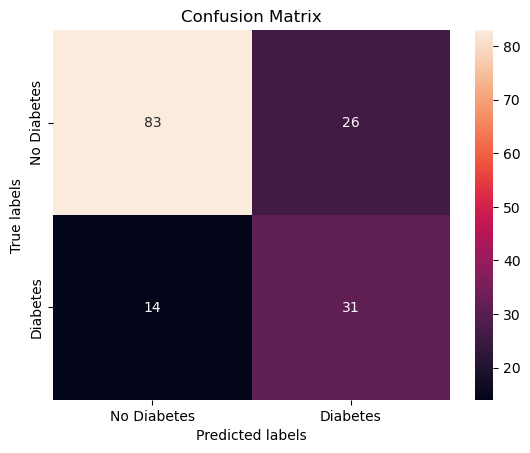

In [25]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [26]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [27]:
test_accuracy = svm.score(x_test, y_test)
print(test_accuracy)

0.7402597402597403


In [28]:
yhat = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, yhat)
print(svm_accuracy)

0.7402597402597403


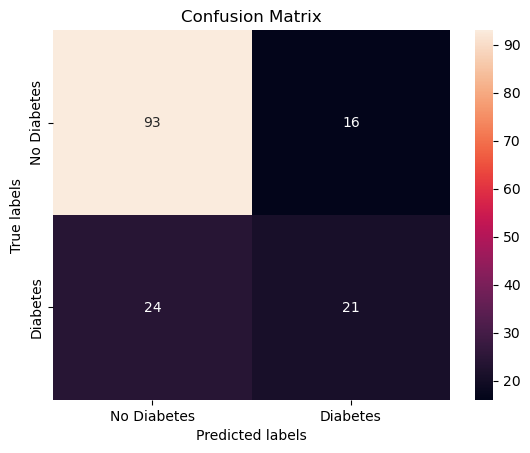

In [29]:
plot_confusion_matrix(y_test, yhat)

In [30]:
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()

In [31]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [32]:
print("Best Parameters: ", knn_cv.best_params_)
print("Accuracy Score: ", knn_cv.best_score_)

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Accuracy Score:  0.7428873611845586


In [33]:
test_accuracy = knn_cv.score(x_test, y_test)
print(test_accuracy)

0.7337662337662337


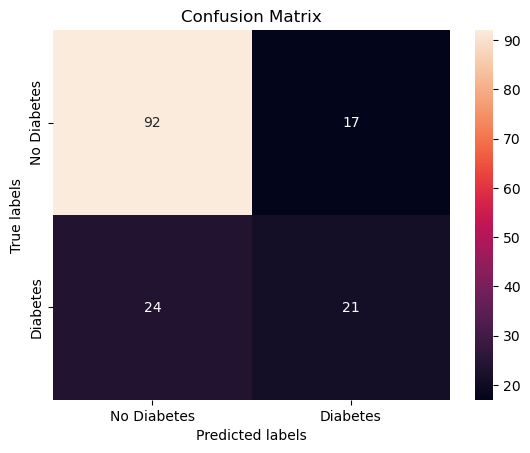

In [34]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [35]:
parameters = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3,5,7],
    'n_estimators': [100,200,300]
}

model = xgb.XGBClassifier()

In [36]:
xgb_cv = GridSearchCV(model, parameters, cv=10)
xgb_cv.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [37]:
print("Best Parameters: ", xgb_cv.best_params_)
print("Accuracy Score: ", xgb_cv.best_score_)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Accuracy Score:  0.7591485986250661


In [38]:
classifiers = [logreg_cv, tree_cv, knn_cv, xgb_cv]
for clf in classifiers:
    clf.fit(X, Y)
    best_es = clf.best_estimator_
    mean_accuracy = clf.best_score_
    print(f"{clf.estimator.__class__.__name__} with GridSearchCV: Best Parameters = {best_es}, Mean Accuracy = {mean_accuracy:.4f}")

LogisticRegression with GridSearchCV: Best Parameters = LogisticRegression(), Mean Accuracy = 0.7722


C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\sklearn\base.py", line 666, in _valid

DecisionTreeClassifier with GridSearchCV: Best Parameters = DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10), Mean Accuracy = 0.7461
KNeighborsClassifier with GridSearchCV: Best Parameters = KNeighborsClassifier(n_neighbors=9, p=1), Mean Accuracy = 0.7513
XGBClassifier with GridSearchCV: Best Parameters = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=

In [39]:
best_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
best_model.fit(x_train, y_train)

LogisticRegression(C=1)

In [40]:
yhat = best_model.predict(x_test)
test_score = accuracy_score(y_test, yhat)
print(test_score)

0.7662337662337663


In [41]:
import pickle

In [42]:
pickle.dump(best_model, open('diabetes_model.pkl', 'wb'))

In [44]:
diabetes_model = pickle.load(open('diabetes_model.pkl', 'rb'))
diabetes_model.fit(x_train, y_train)

LogisticRegression(C=1)

In [45]:
pickle.dump(diabetes_model, open('diabetes_model.pkl', 'wb'))